# 0)Intro

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv("/Users/markrudolf/VSCode/Seoul_Bike_Demand/dds_group_16/SeoulBikeData.csv", encoding="latin1")

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DayOfWeek,Month
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,3.002740,6.526027
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,7.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,5.000000,10.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,6.000000,12.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.998056,3.448048


In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayOfWeek,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12


# 1)Time-Based Visualizations

## 1.1) Daily Time Series

In [5]:
daily = df.groupby("Date")["Rented Bike Count"].sum().reset_index()

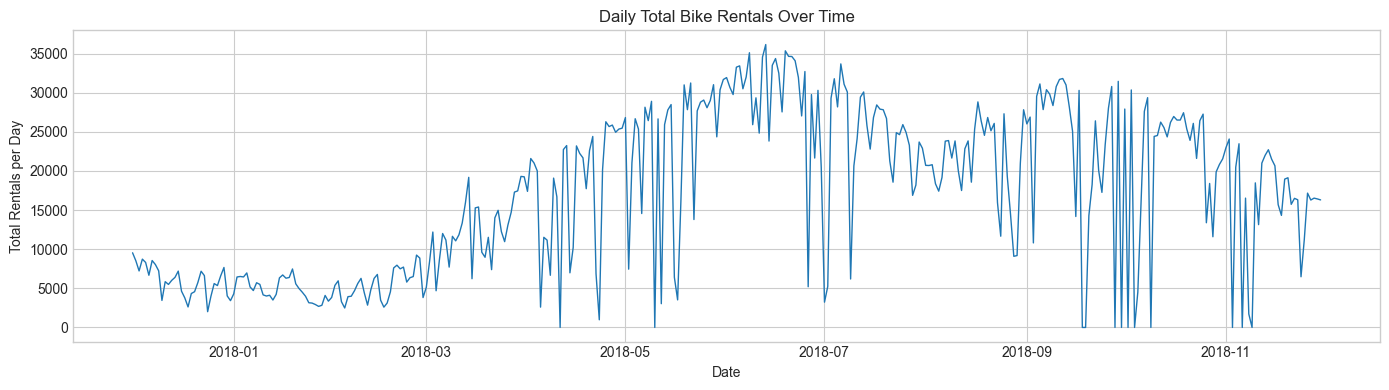

In [6]:
plt.figure(figsize=(14, 4))
plt.plot(daily["Date"], daily["Rented Bike Count"], linewidth=1)
plt.title("Daily Total Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals per Day")
plt.tight_layout()
plt.show()


Daily rentals increase from winter into summer and decrease again in autumn, showing clear seasonality.

## 1.2) Hourly Rental Pattern

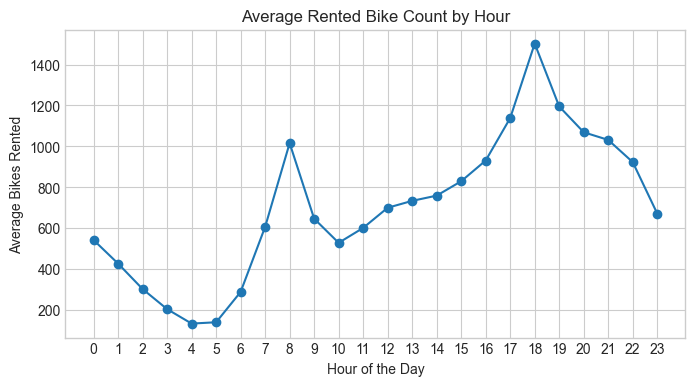

In [7]:
hourly = df.groupby("Hour")["Rented Bike Count"].mean()

plt.figure(figsize=(8, 4))
hourly.plot(marker="o")
plt.xticks(range(0, 24))
plt.title("Average Rented Bike Count by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Bikes Rented")
plt.grid(True)
plt.show()


Two strong peaks appear at 8 AM and 6 PM, corresponding to rush-hour commuting behavior.

## 1.3) Daily Pattern (Day of Week)

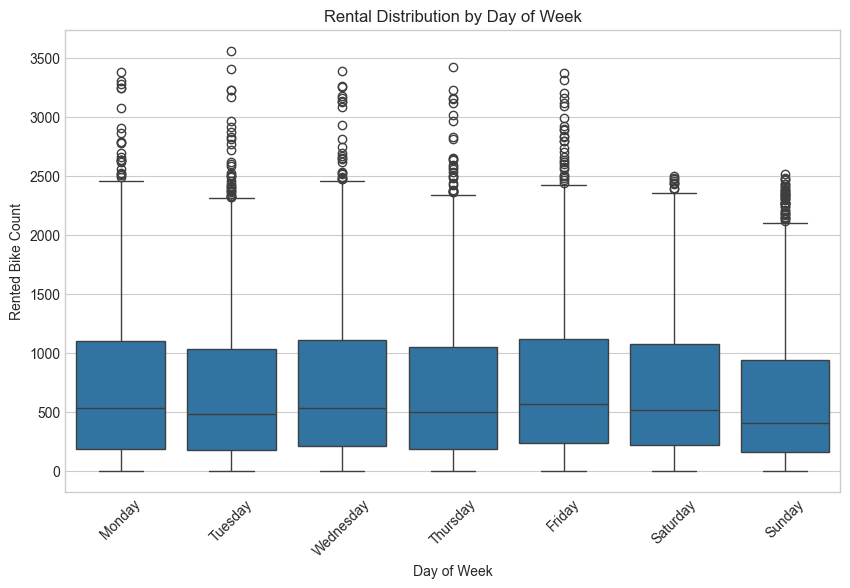

In [9]:
df["WeekdayName"] = df["Date"].dt.day_name()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="WeekdayName", y="Rented Bike Count",
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Rental Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Rented Bike Count")
plt.xticks(rotation=45)
plt.show()


Weekdays show higher median rentals and greater variability, reflecting strong commuting activity.
Saturdays remain relatively busy with more consistent usage, while Sundays have the lowest rental levels.
The many high-value outliers on weekdays indicate occasional periods of very high demand.

## 1.4) Seasonal Pattern

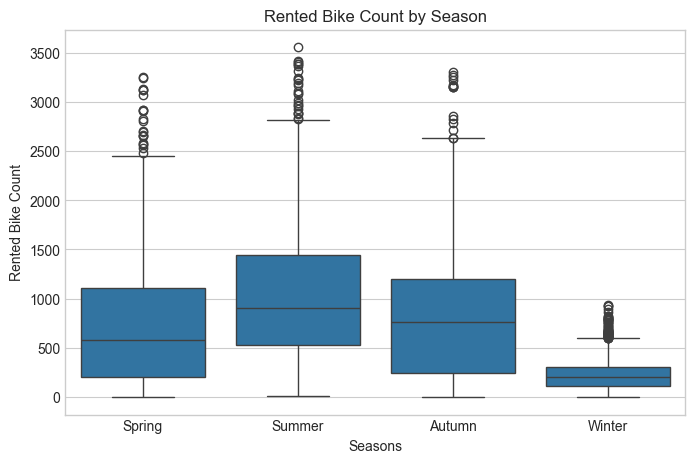

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Seasons",
    y="Rented Bike Count",
    order=["Spring", "Summer", "Autumn", "Winter"]
)
plt.title("Rented Bike Count by Season")
plt.show()


Weekdays show higher median rentals and greater variability, reflecting strong commuting activity.
Saturdays remain relatively busy with more consistent usage, while Sundays have the lowest rental levels.
The many high-value outliers on weekdays indicate occasional periods of very high demand.

# 2) Distribution Visualizations

## 2.1) Histograms for Numerical Features

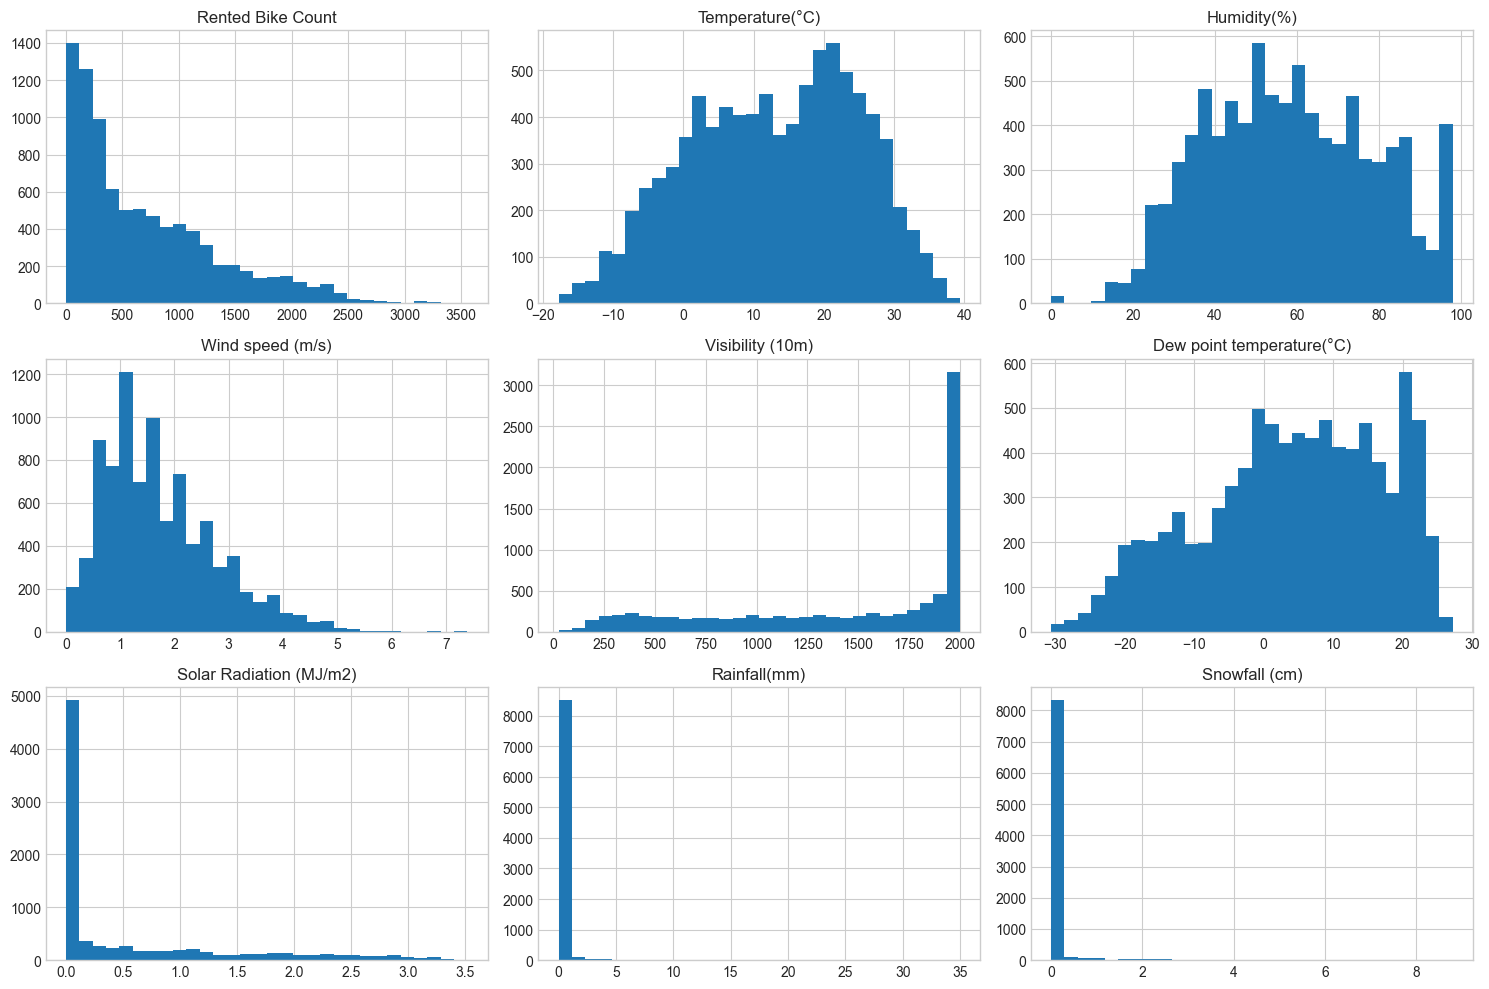

In [16]:
num_cols = [
    "Rented Bike Count",
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)"
]

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


Most numerical variables are skewed. Bike rentals themselves are heavily right-skewed, meaning that very high demand hours are rare.
Rainfall, snowfall and solar radiation are zero for the majority of observations, while temperature, humidity and wind speed show wider, more natural distributions.

## 2.2) Boxplots for Weather Variables

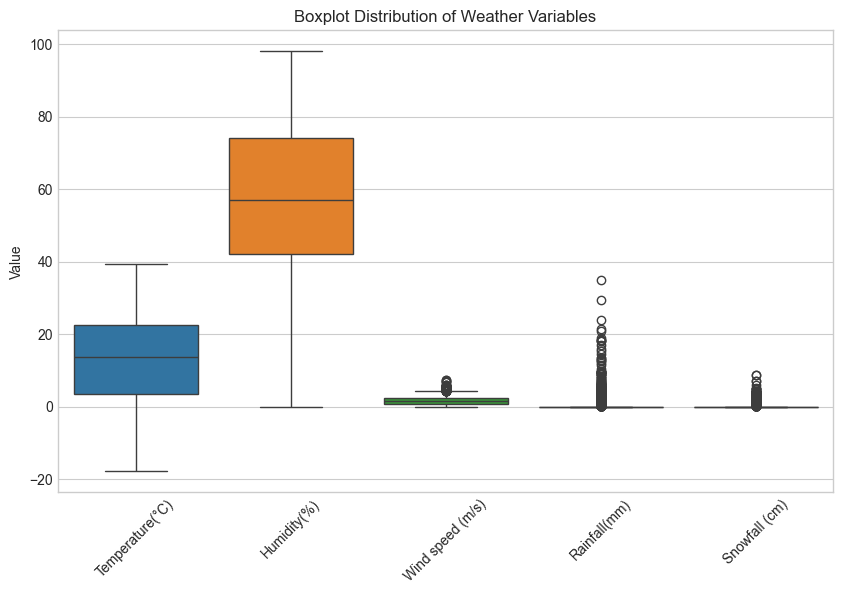

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df[[
        "Temperature(°C)",
        "Humidity(%)",
        "Wind speed (m/s)",
        "Rainfall(mm)",
        "Snowfall (cm)"
    ]]
)
plt.title("Boxplot Distribution of Weather Variables")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.show()


Weather variables show skewed distributions. Temperature and humidity vary widely throughout the year. Wind speed remains low with a narrow range of values, while rainfall and snowfall are zero for most hours but include several larger precipitation events, which appear as outliers.

# 3) Correlation Analysis

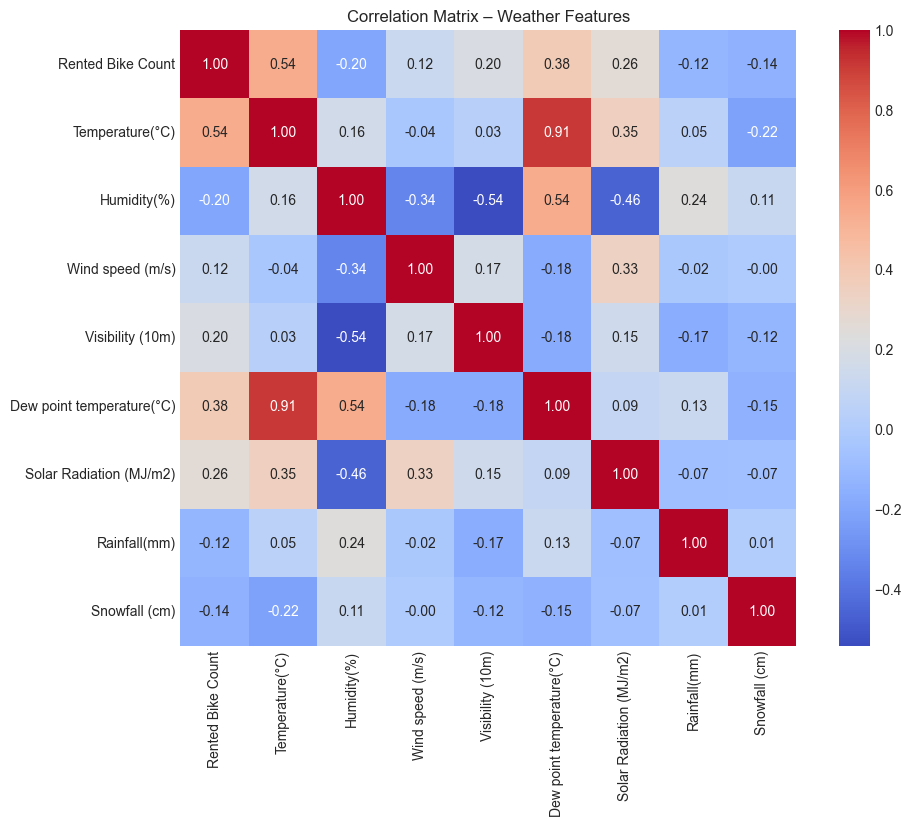

In [28]:
plt.figure(figsize=(11, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix – Weather Features")
plt.show()


Bike rentals show the strongest positive correlation with temperature, indicating higher demand in warmer conditions. Dew point temperature is also positively correlated with rentals, but it is highly correlated with temperature itself, suggesting redundancy between these features. Rainfall and snowfall exhibit weak negative correlations with rentals, reflecting reduced bike usage during precipitation, while other weather variables show only moderate or weak relationships.

# 4) Statistical Summaries

## 4.1) Weather Summary

In [22]:
df[["Temperature(°C)", "Humidity(%)", "Wind speed (m/s)",
    "Rainfall(mm)", "Snowfall (cm)"]].describe()


,Temperature(°C),Humidity(%),Wind speed (m/s),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.882922,58.226256,1.724909,0.148687,0.075068
std,11.944825,20.362413,1.036300,1.128193,0.436746
min,-17.800000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,42.000000,0.900000,0.000000,0.000000
50%,13.700000,57.000000,1.500000,0.000000,0.000000
75%,22.500000,74.000000,2.300000,0.000000,0.000000
max,39.400000,98.000000,7.400000,35.000000,8.800000


The summary statistics show wide ranges for temperature and humidity, while wind speed stays low. Rainfall and snowfall have very low medians but occasional high values. Humidity includes some 0% entries, which are likely measurement errors but occur only rarely.

## 4.2) Average Rentals By Hour

In [29]:
df.groupby("Hour")["Rented Bike Count"].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

The numerical averages confirm the strong hourly variation observed in the plots, with demand peaking during commuting hours.

## 4.3) Average Rentals By Day of Week

In [30]:
df.groupby("DayOfWeek")["Rented Bike Count"].mean()

DayOfWeek
0    730.563301
1    687.977564
2    740.349359
3    690.704327
4    747.117925
5    709.528846
6    625.155449
Name: Rented Bike Count, dtype: float64

Average rentals vary across the week, with higher values from Monday to Saturday and lower values on Sunday.

## 4.4) Average Rentals By Season

In [31]:
df.groupby("Seasons")["Rented Bike Count"].mean()

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

Seasonal averages highlight significantly higher demand during warmer seasons, especially summer.

#holiday vs non-holiday

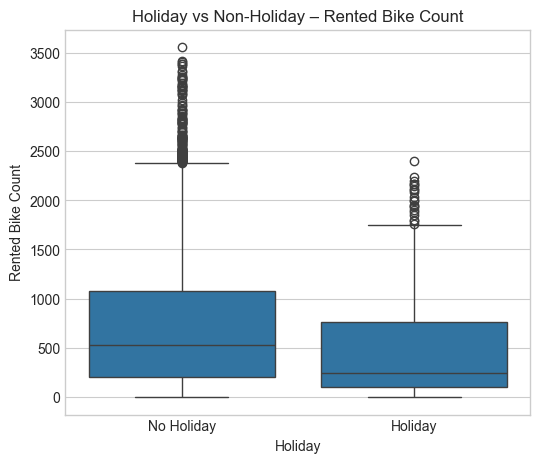

In [24]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="Holiday", y="Rented Bike Count")
plt.title("Holiday vs Non-Holiday – Rented Bike Count")
plt.show()


Rentals tend to be lower on holidays compared to normal days

Clear seasonal trend - increase from winter into summer, peak around mid-year, decline again
Daily values are highly variable

#scatterplot temperature vs bike count

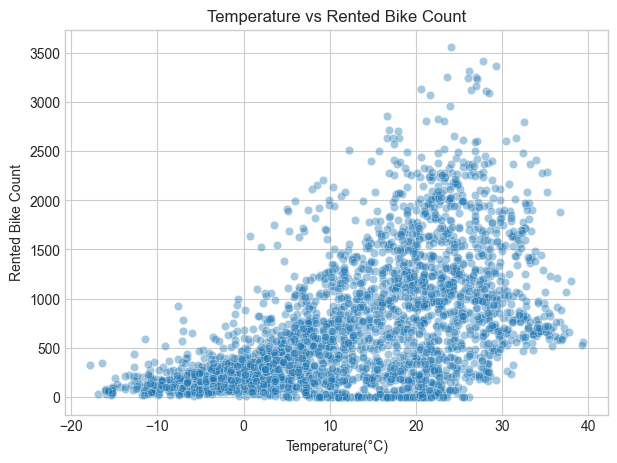

In [25]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df.sample(3000, random_state=42),
    x="Temperature(°C)",
    y="Rented Bike Count",
    alpha=0.4
)
plt.title("Temperature vs Rented Bike Count")
plt.show()


Clear positive relationship: higher temperatures generally lead to more rentals, but not perfeclty linear (slows down after around 30 degrees)

#scatterplot rainfall vs bike count

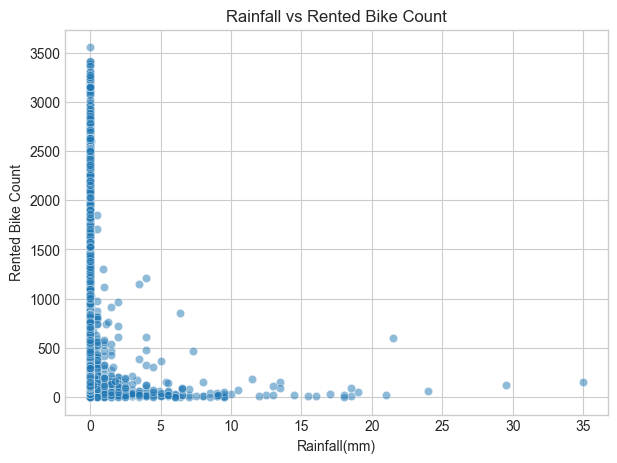

In [26]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="Rainfall(mm)",
    y="Rented Bike Count",
    alpha=0.5
)
plt.title("Rainfall vs Rented Bike Count")
plt.show()


No rainfall - high rental, even small amounts of rainfall -> significantly reduce demand

In [36]:
df.groupby("Date")["Hour"].nunique().value_counts()


Hour
24    365
Name: count, dtype: int64